In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score

import wrangle
import evaluate

In [2]:
# acquire data and split data using a function from wrangle module
train, validate, test = wrangle.wrangle_zillow()

# get rows and columns of data
train.shape, validate.shape, test.shape

((901586, 7), (386395, 7), (321996, 7))

In [3]:
# peak into data
train.head()

,bedroom,bathroom,sqft,tax_value,year_built,tax_amount,fips
1551601,2.0,2.0,1044.0,81562.0,1948.0,1096.38,6037.0
919302,3.0,2.0,1208.0,834159.0,1942.0,9996.74,6037.0
1944334,3.0,1.0,972.0,140980.0,1954.0,1880.62,6037.0
1048208,3.0,1.0,1803.0,140348.0,1962.0,2461.62,6037.0
314406,3.0,2.0,1572.0,235819.0,1968.0,3374.57,6037.0


#### 2. Fit a linear regression model (ordinary least squares) and compute yhat, predictions of taxvaluedollarcnt using only calculatedfinishedsqft.

In [4]:
# createa a dataframe with needed variables 
preds= train[['sqft', 'tax_value']]

# peak into data
preds.head()

,sqft,tax_value
1551601,1044.0,81562.0
919302,1208.0,834159.0
1944334,972.0,140980.0
1048208,1803.0,140348.0
314406,1572.0,235819.0


In [5]:
# create model
osl_model = LinearRegression()

# fit model
osl_model.fit(train[['sqft']], train[['tax_value']])

LinearRegression()

In [6]:
# compute predictions
preds['yhat'] = osl_model.predict(train[['sqft']])

# peak into data
preds.head()

,sqft,tax_value,yhat
1551601,1044.0,81562.0,258606.941165
919302,1208.0,834159.0,285523.224166
1944334,972.0,140980.0,246790.036434
1048208,1803.0,140348.0,383176.811880
314406,1572.0,235819.0,345264.242532


#### 3. Plot the residuals for the linear regression model that you made.

In [7]:
# compute model residual
preds['residuals'] = preds['yhat'] - preds['tax_value']

# peak into data
preds.head()

,sqft,tax_value,yhat,residuals
1551601,1044.0,81562.0,258606.941165,177044.941165
919302,1208.0,834159.0,285523.224166,-548635.775834
1944334,972.0,140980.0,246790.036434,105810.036434
1048208,1803.0,140348.0,383176.811880,242828.811880
314406,1572.0,235819.0,345264.242532,109445.242532


Text(0.5, 1.0, 'Residual vs Actual Value')

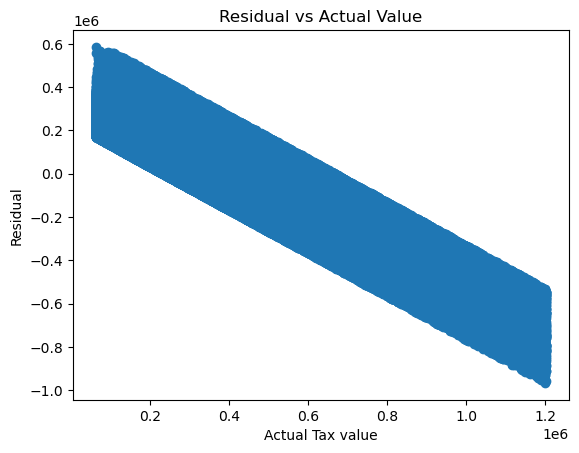

In [8]:
# visualize actual vs residual
plt.scatter(preds['tax_value'], preds ['residuals'])
plt.xlabel('Actual Tax value')
plt.ylabel('Residual')
plt.title('Residual vs Actual Value')

#### 4. Calculate the sum of squared errors, explained sum of squares, total sum of squares, mean squared error, and root mean squared error for your model.

In [9]:
# compute sum of squared errors (SSE )
# SSE = (preds['residuals'] **2).sum()
SSE = mean_squared_error(preds['tax_value'], preds.yhat)*len(preds)
SSE

3.652122473248143e+16

In [10]:
# compute explained sum of squares (ESS)
ESS = ((preds['yhat']-preds['tax_value'].mean()) ** 2).sum()
ESS 

7616996791518804.0

In [11]:
# compute total sum of squares (TSS)
TSS = SSE + ESS
TSS

4.413822152400024e+16

In [12]:
# compute mean squared error (MSE)
# MSE = SSE / len(preds)
MSE = mean_squared_error(preds['tax_value'], preds.yhat)
MSE

40507754925.74356

In [13]:
# compute root mean squared error (RMSE)
# RMSE = MSE ** .5
RMSE = mean_squared_error(preds['tax_value'], preds.yhat, squared=False )
RMSE

201265.38432066145

#### 5. Calculate the sum of squared errors, mean squared error, and root mean squared error for the baseline model (i.e. a model that always predicts the average taxvaluedollarcnt amount).

In [14]:
# get baseline
preds['yhat_baseline'] = train['tax_value'].mean()

# peak into data
preds.head()

,sqft,tax_value,yhat,residuals,yhat_baseline
1551601,1044.0,81562.0,258606.941165,177044.941165,372882.297124
919302,1208.0,834159.0,285523.224166,-548635.775834,372882.297124
1944334,972.0,140980.0,246790.036434,105810.036434,372882.297124
1048208,1803.0,140348.0,383176.811880,242828.811880,372882.297124
314406,1572.0,235819.0,345264.242532,109445.242532,372882.297124


In [15]:
preds['yhat_baseline_residuals'] = preds['yhat_baseline']- preds['tax_value']
# peak into data
preds.head()

,sqft,tax_value,yhat,residuals,yhat_baseline,yhat_baseline_residuals
1551601,1044.0,81562.0,258606.941165,177044.941165,372882.297124,291320.297124
919302,1208.0,834159.0,285523.224166,-548635.775834,372882.297124,-461276.702876
1944334,972.0,140980.0,246790.036434,105810.036434,372882.297124,231902.297124
1048208,1803.0,140348.0,383176.811880,242828.811880,372882.297124,232534.297124
314406,1572.0,235819.0,345264.242532,109445.242532,372882.297124,137063.297124


In [16]:
# compute sum of squared errors (SSE )
# SSE_baseline = (preds['yhat_baseline_residuals'] **2).sum()
SSE_baseline = mean_squared_error(preds['tax_value'], preds.yhat_baseline)*len(preds)
SSE_baseline

4.413822152401067e+16

In [17]:
# compute explained sum of squares (ESS)
# MSE = SSE_baseline / len(preds)
MSE_baseline = mean_squared_error(preds['tax_value'], preds.yhat_baseline)
MSE_baseline

48956196662.338005

In [18]:
# compute root mean squared error (RMSE)
# RMSE = MSE_baseline ** .5
RMSE_baseline = mean_squared_error(preds['tax_value'], preds.yhat_baseline, squared=False )
RMSE_baseline

221260.47243540362

#### 6. Write python code that compares the sum of squared errors for your model against the sum of squared errors for the baseline model and outputs whether or not your model performs better than the baseline model.

In [19]:
# print  SSE of baseline model and model
print(f'baseline model SSE: {SSE_baseline}')
print(f'model SSE: {SSE}\n')


# compare SSE of baseline and SSE of model
if SSE < SSE_baseline: 
    print('model performs better than baseline model')
else:
    print('baseline model performs better than model')
    

baseline model SSE: 4.413822152401067e+16
model SSE: 3.652122473248143e+16

model performs better than baseline model


#### 7. What is the amount of variance explained in your model?

In [20]:
# compute explained variance score using explained_variance_score
evs = explained_variance_score(preds['tax_value'], preds.yhat)
evs

0.17257144779577682

In [21]:
# compute explained variance score using sklearn r2_score
r2_score(preds['tax_value'], preds.yhat)

0.17257144779577682

In [22]:
# compute explained variance score manually
R2 = ESS / TSS
R2

0.17257144779558115

#### 8. Is your model better than the baseline model?

In [23]:
# print  SSE of baseline model and model
print(f'baseline model RMSE: {RMSE_baseline}')
print(f'model RMSE: {RMSE}\n')

# compare SSE of baseline and SSE of model
if RMSE < RMSE_baseline: 
    print('model performs better than baseline model')
else:
    print('baseline model performs better than model')

baseline model RMSE: 221260.47243540362
model RMSE: 201265.38432066145

model performs better than baseline model


#### 9. Create a file named evaluate.py that contains the following functions.
- plot_residuals(y, yhat): creates a residual plot
- regression_errors(y, yhat): returns the following values:
    - sum of squared errors (SSE)
    - explained sum of squares (ESS)
    - total sum of squares (TSS)
    - mean squared error (MSE)
    - root mean squared error (RMSE)
- baseline_mean_errors(y): computes the SSE, MSE, and RMSE for the baseline model
- better_than_baseline(y, yhat): returns true if your model performs better than the baseline, otherwise false

In [24]:
def plot_residuals(y, yhat):
    '''takes in actual vale and predicated value to create a scatter plot graph'''
    
    residuals =  yhat -y
    
    plt.scatter(x=y , y=residuals)
    plt.xlabel('Actual Tax value')
    plt.ylabel('Residuals')
    plt.title('Residual vs Actual Value')
    plt.show()

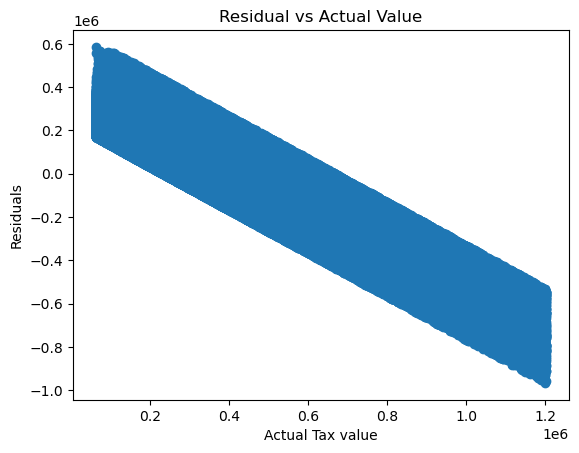

In [25]:
plot_residuals(preds['tax_value'], preds['yhat'])

In [26]:
def regression_errors(y, yhat):
    '''takes in actual value and predicted value and return SSE, ESS, TSS, MSE, RMSE'''
    
    # compute SSE 
    SSE = mean_squared_error(y, yhat)*len(y)
    
    # compute ESS
    ESS =  ESS = ((yhat-y.mean()) ** 2).sum()
    
    # compute TSS
    TSS = SSE + ESS
    
    # compute MSE 
    MSE = mean_squared_error(y, yhat)
    
    # compute RMSE 
    RMSE = mean_squared_error(y, yhat, squared=False )
    
    return SSE, ESS, TSS, MSE, RMSE

In [27]:
regression_errors(preds['tax_value'], preds['yhat'])

(3.652122473248143e+16,
 7616996791518804.0,
 4.413822152400024e+16,
 40507754925.74356,
 201265.38432066145)

In [28]:
def baseline_mean_errors(y):
    '''takes in actual value and return SSE, MSE, RMSE'''

   # compute yhat_baseline
    baseline = np.repeat(y.mean(), len(y))
    
    # compute SSE 
    SSE_baseline = mean_squared_error(y,baseline)*len(y)
    
    # compute MSE 
    MSE_baseline = mean_squared_error(y, baseline)
    
    # compute RMSE 
    RMSE_baseline = mean_squared_error(y,baseline, squared=False )
    
    return SSE_baseline, MSE_baseline, RMSE_baseline

In [29]:
baseline_mean_errors(preds['tax_value'])

(4.413822152401067e+16, 48956196662.338005, 221260.47243540362)

In [30]:
def better_than_baseline(y, yhat):
    '''takes in actual value and predicted value and returns true if model performs better 
    than the baseline, otherwise false'''
    
    # call function to get SSE, MSE, RMSE of model
    SSE, ESS, TSS, MSE, RMSE = regression_errors(y, yhat)
    
    # call function to SSE, MME, RMSE of baseline model
    SSE_baseline, MSE_baseline, RMSE_baseline = baseline_mean_errors(y)
    
    # compare REMSE of model and baseline model
    if RMSE < RMSE_baseline: 
        return True
    else:
        return False

In [31]:
better_than_baseline(preds['tax_value'], preds['yhat'])

True

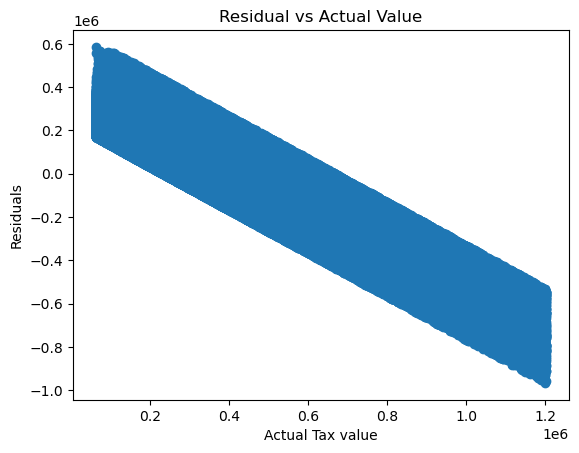

True

In [32]:
# check if evaluate.py works
evaluate.plot_residuals(preds['tax_value'], preds['yhat'])
evaluate.better_than_baseline(preds['tax_value'], preds['yhat'])